<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/mlc_2324_w3_knn_regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression

* Machine Learning Concepts (MLC)
* Week 3, 2023/24
* Luciano Gerber
* Regression, Numeric Relationships, kNN Regression, Scaling, Residuals, Mean Absolute Error, Actual vs Predicted Plot, Residual Plot, Prediction against One-Feature Model

## Preamble: Importing and Configuring Essential Packages


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

### Example Dataset: Advertising and Sales

In [ ]:
adv = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0015-2324/main/datasets/Advertising.csv')

In [ ]:
adv.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [ ]:
adv = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0015-2324/main/datasets/Advertising.csv',
    index_col=0
)

In [ ]:
adv.head(3)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


## Utilities

In [ ]:
def plot_actual_vs_predicted_joint(est, X, y):
    """Needs tweaking, of course; similar to what latest sklearn versions can do; this one
    uses seaborn's jointplot with the nice marginal histograms"""

    g = sns.jointplot(x=y, y=est.predict(X), alpha=0.5)
    # for the diagonal of correct predictions, need the lower-left and upper-right limits
    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [min(x0, y0), max(x1, y1)] # more generic solution
    # lims = [0, max(x1, y1)]
    g.ax_joint.set(xlim=lims, ylim=lims)
    g.ax_joint.plot(lims, lims, ':k', alpha=0.3, lw=1);
    g.ax_joint.set(xlabel='True Target Value')
    g.ax_joint.set(ylabel='Predicted Target Value')

    return g, g.ax_joint

## EDA: Features/Target Distributions

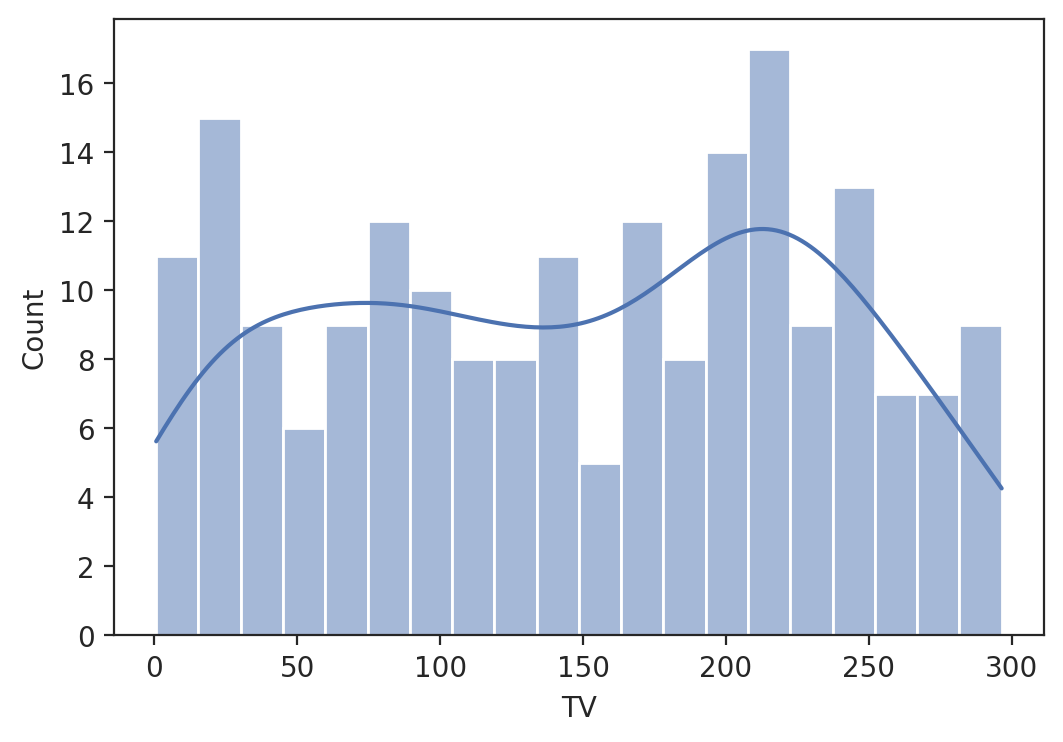

In [ ]:
sns.histplot(data=adv, x='TV', kde=True, bins=20);

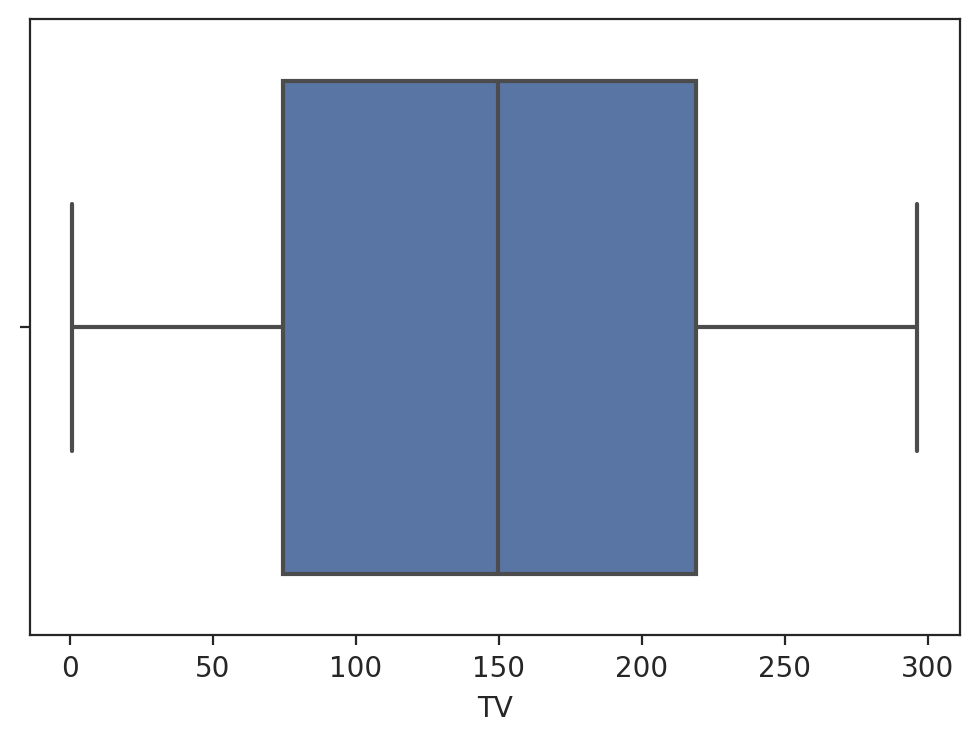

In [ ]:
sns.boxplot(data=adv, x='TV');

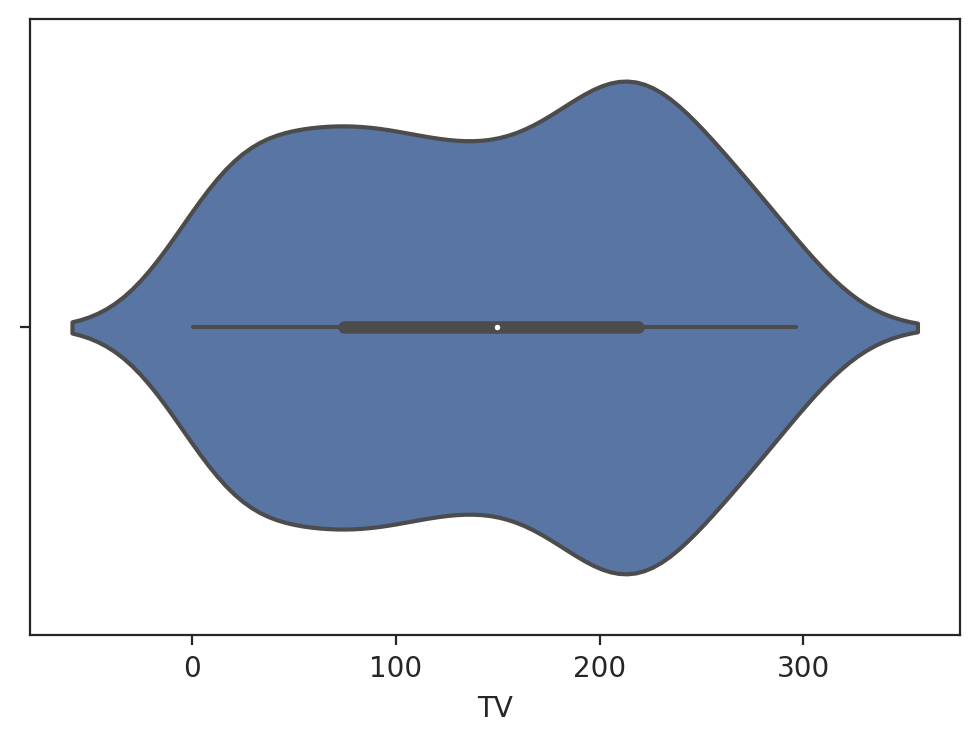

In [ ]:
# good opportunity to introduce violin plots (a KDE/boxplot)
sns.violinplot(data=adv, x='TV');

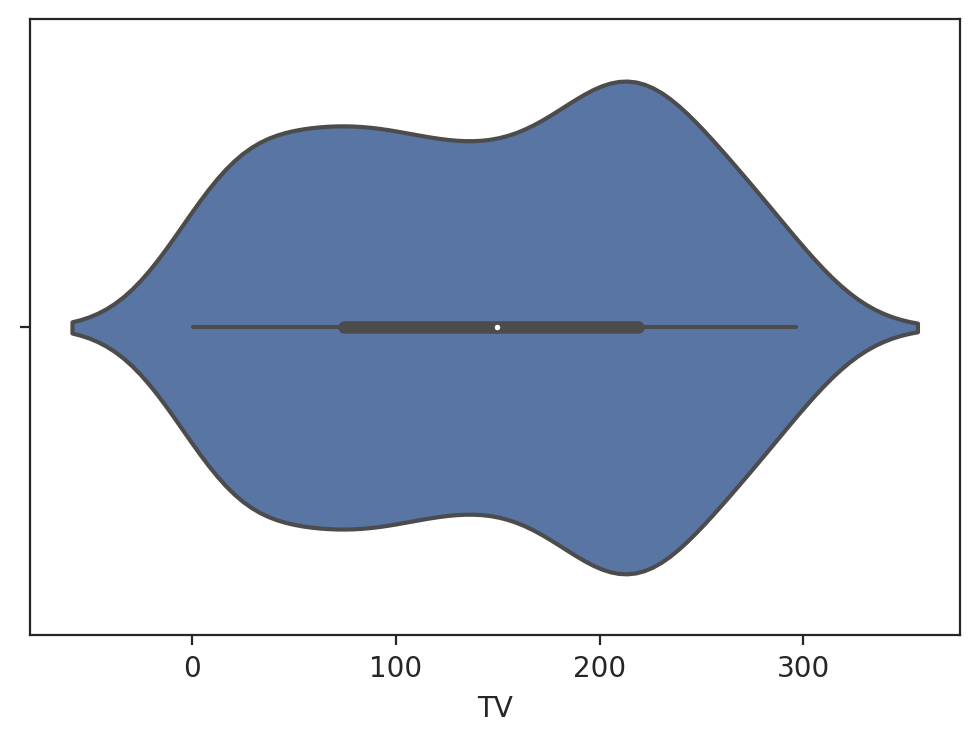

In [ ]:
sns.violinplot(data=adv, x='TV', split=True);

## EDA: Feature/Target Relationships

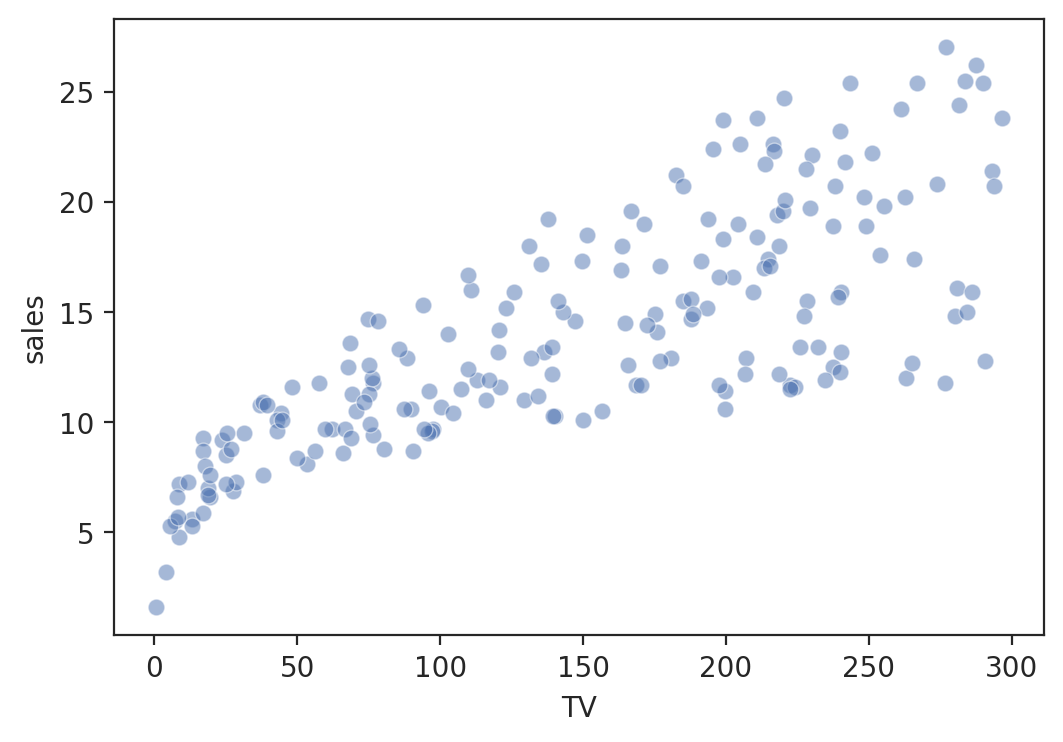

In [ ]:
# sns.regplot(data=adv, x='TV', y='sales', scatter_kws=dict(alpha=0.5));
sns.scatterplot(data=adv, x='TV', y='sales', alpha=0.5);

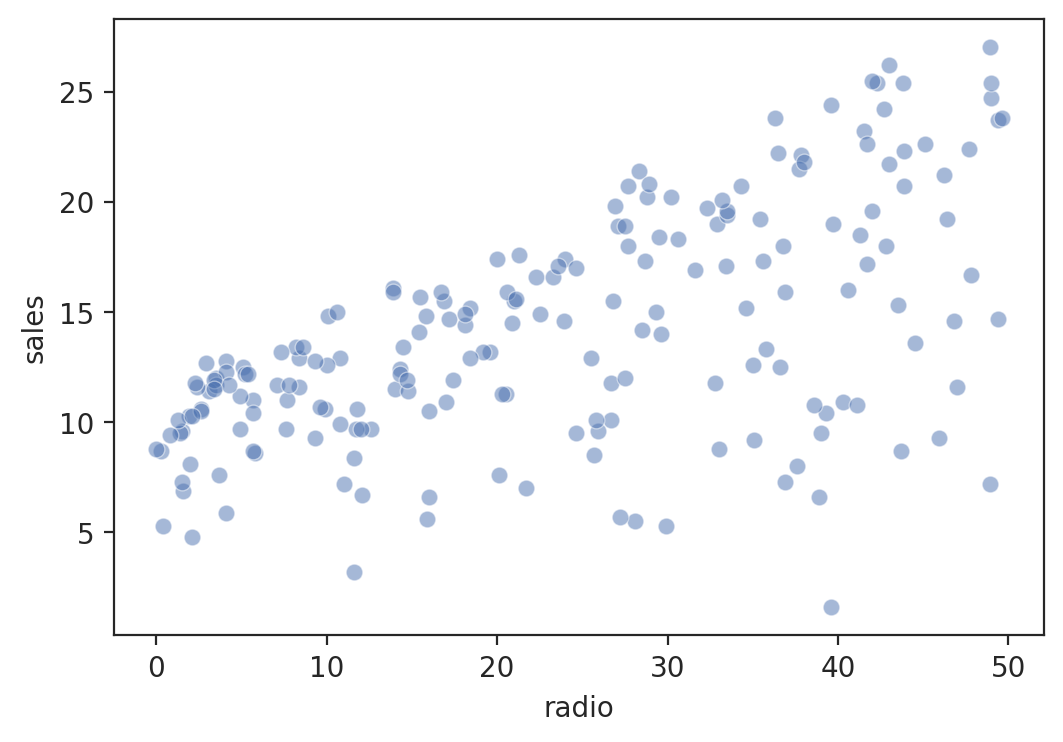

In [ ]:
sns.scatterplot(data=adv, x='radio', y='sales', alpha=0.5);

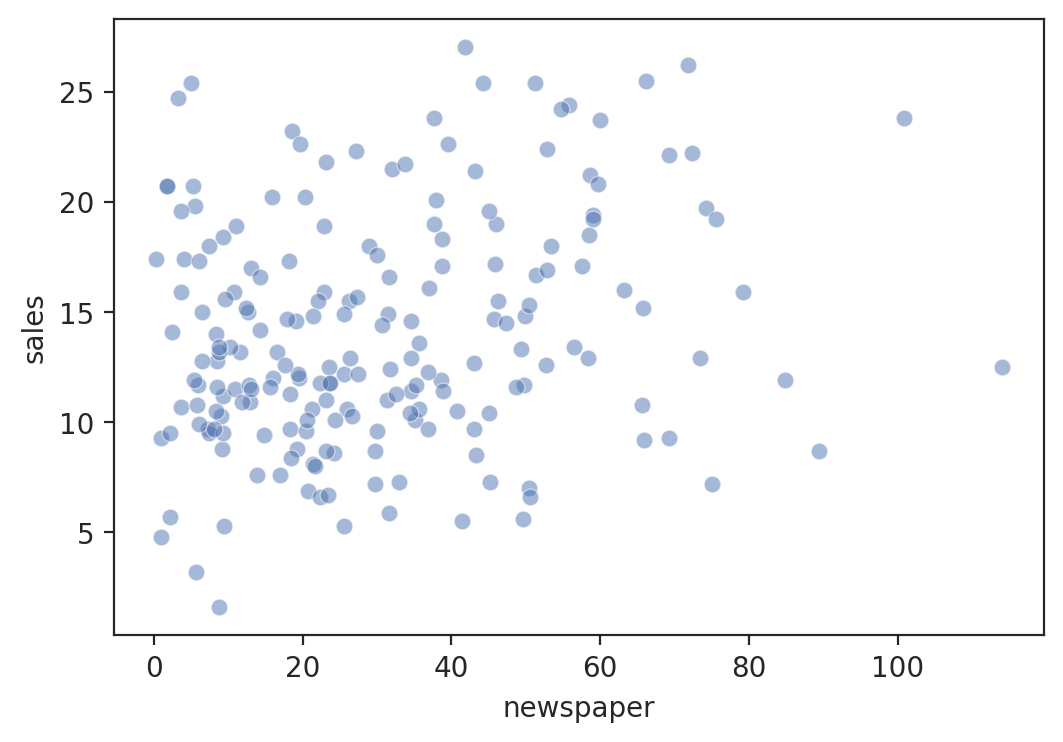

In [ ]:
sns.scatterplot(data=adv, x='newspaper', y='sales', alpha=0.5);

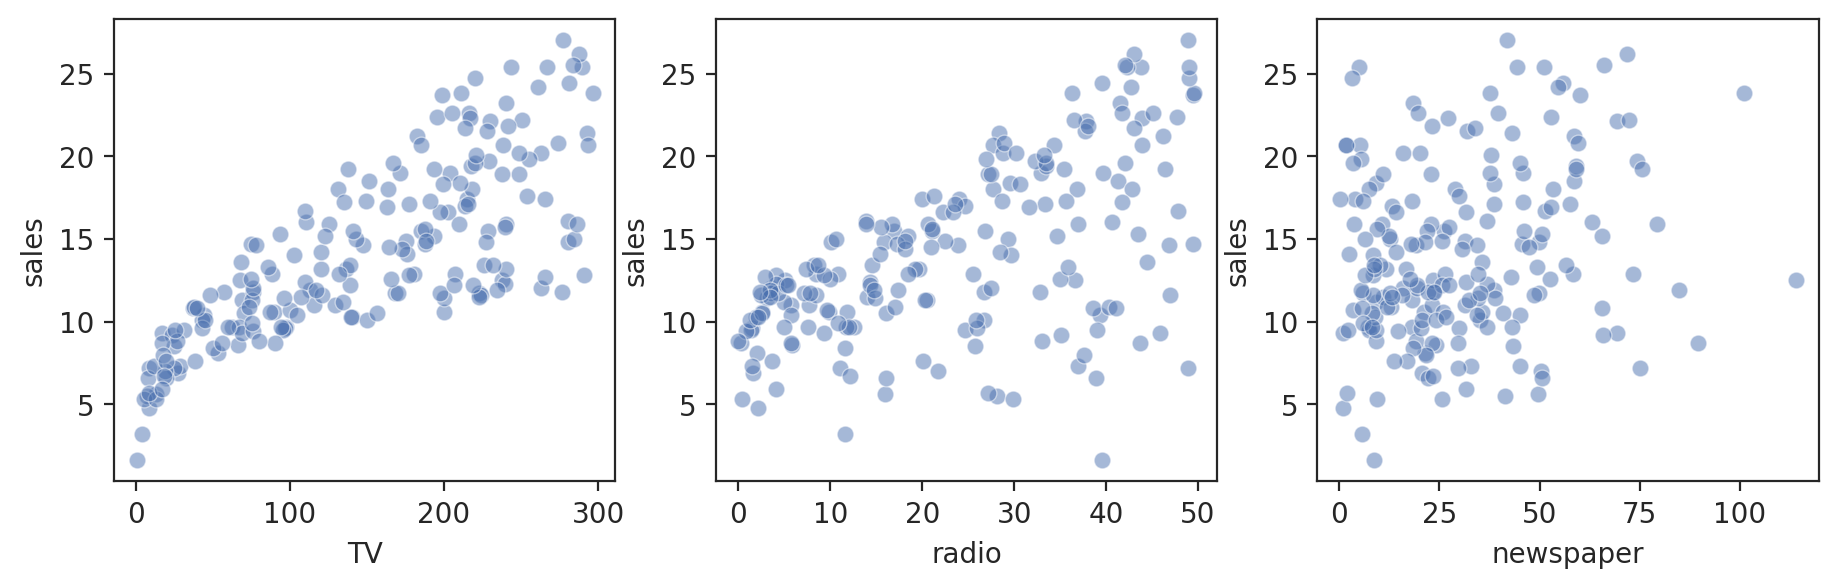

In [ ]:
# good opportunity to introduce subplots/plotgrids
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,3))
sns.scatterplot(data=adv, x='TV', y='sales', alpha=0.5, ax=axs[0])
sns.scatterplot(data=adv, x='radio', y='sales', alpha=0.5, ax=axs[1])
sns.scatterplot(data=adv, x='newspaper', y='sales', alpha=0.5, ax=axs[2]);

## The X/y Split

In [ ]:
X = adv.drop(columns='sales')
y = adv['sales']

## The Train/Test Split


In [ ]:
# Obs.: normally, this is done before any data transformations to avoid "leakage".
# We'll come back to this when we discuss pipelines later in the term
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((150, 3), (50, 3))

## What does a kNN Regressor Look Like?

A kNN classifier takes the majority class of the neighbours as a prediction (e.g., non-diabetic); a kNN regressor produces the average value (e.g., mean) of the target from the neighbours (e.g., sales).

In [ ]:
X_tv = X[['TV']]

In [ ]:
X_tv_train, X_tv_test = X_train[['TV']], X_test[['TV']]

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=11)

In [ ]:
knnr.fit(X_tv_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
a_linear_test_set = pd.DataFrame(
    np.linspace(X[['TV']].min(), X[['TV']].max(), 500), columns=X_tv_train.columns
)

In [ ]:
a_linear_test_set.head()

,TV
0,0.700000
1,1.292585
2,1.885170
3,2.477756
4,3.070341


In [ ]:
y_pred = knnr.predict(a_linear_test_set)

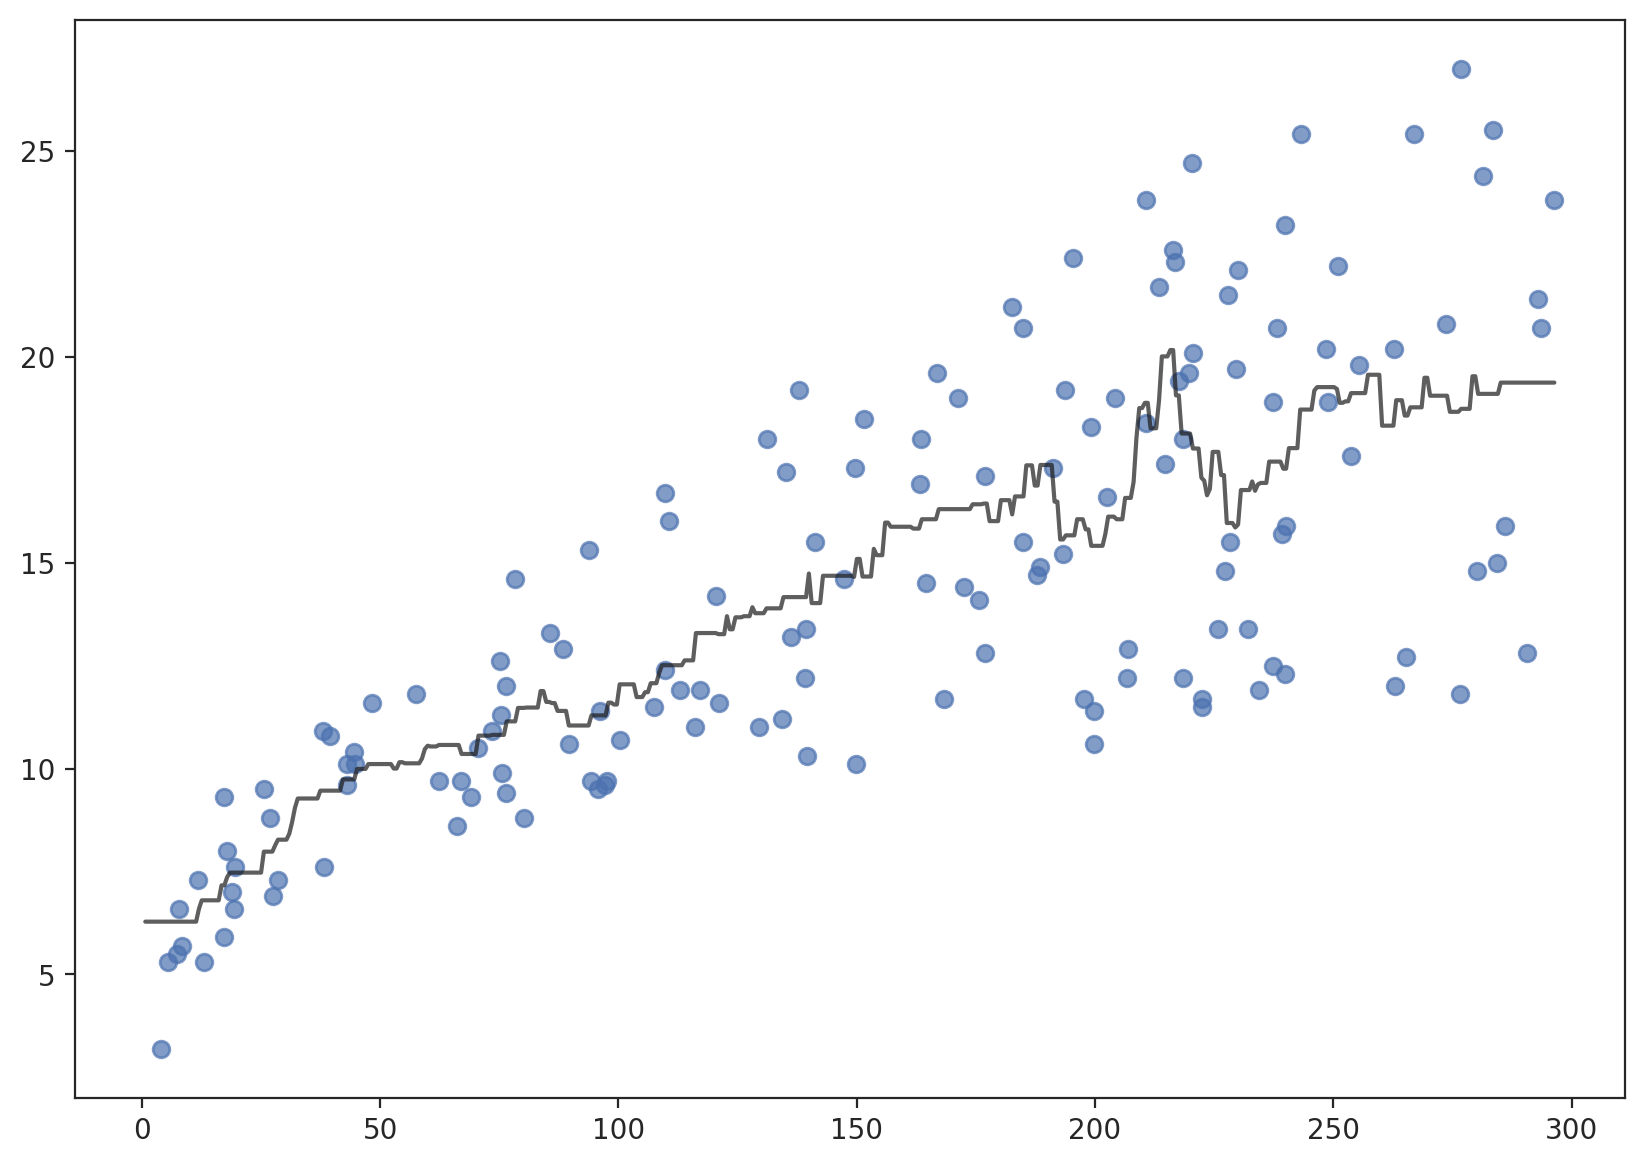

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(X_tv_train['TV'], y_train, alpha=0.7)
ax.plot(a_linear_test_set, knnr.predict(a_linear_test_set), '-k', alpha=0.7);

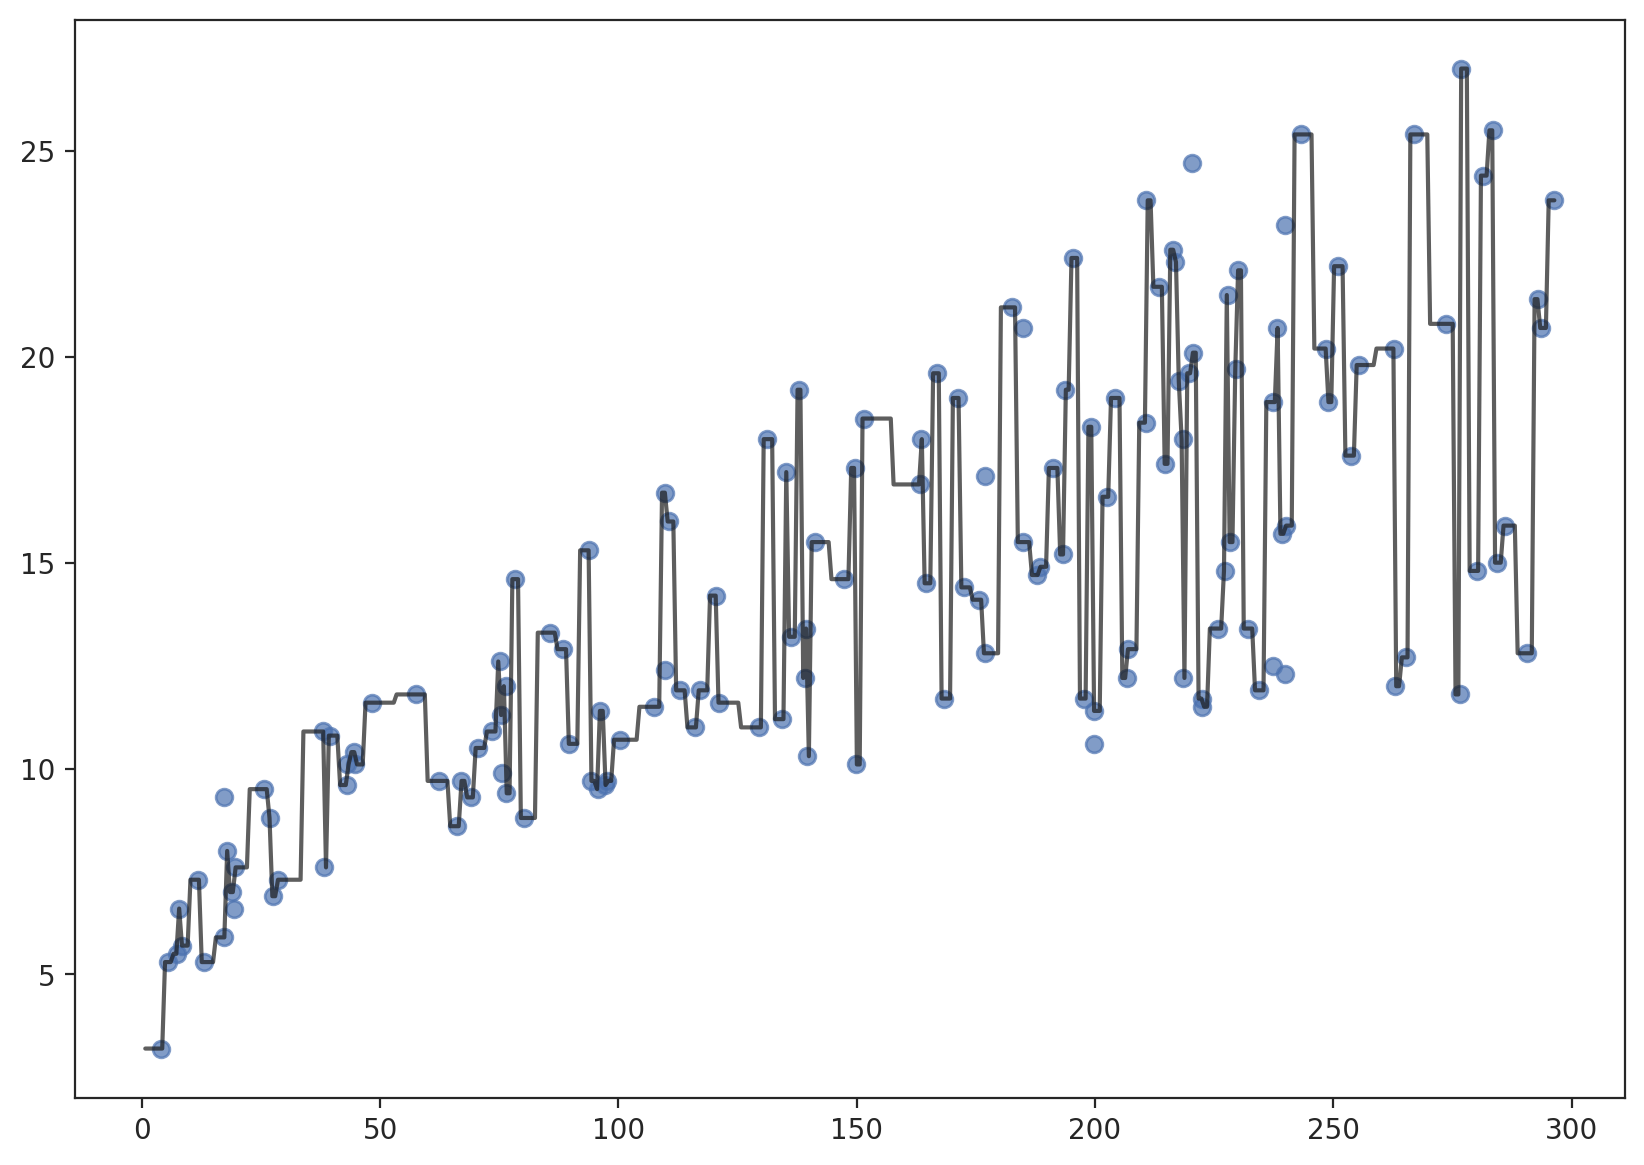

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=1)
knnr.fit(X_tv_train, y_train)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(X_tv_train['TV'], y_train, alpha=0.7)
ax.plot(a_linear_test_set, knnr.predict(a_linear_test_set), '-k', alpha=0.7);

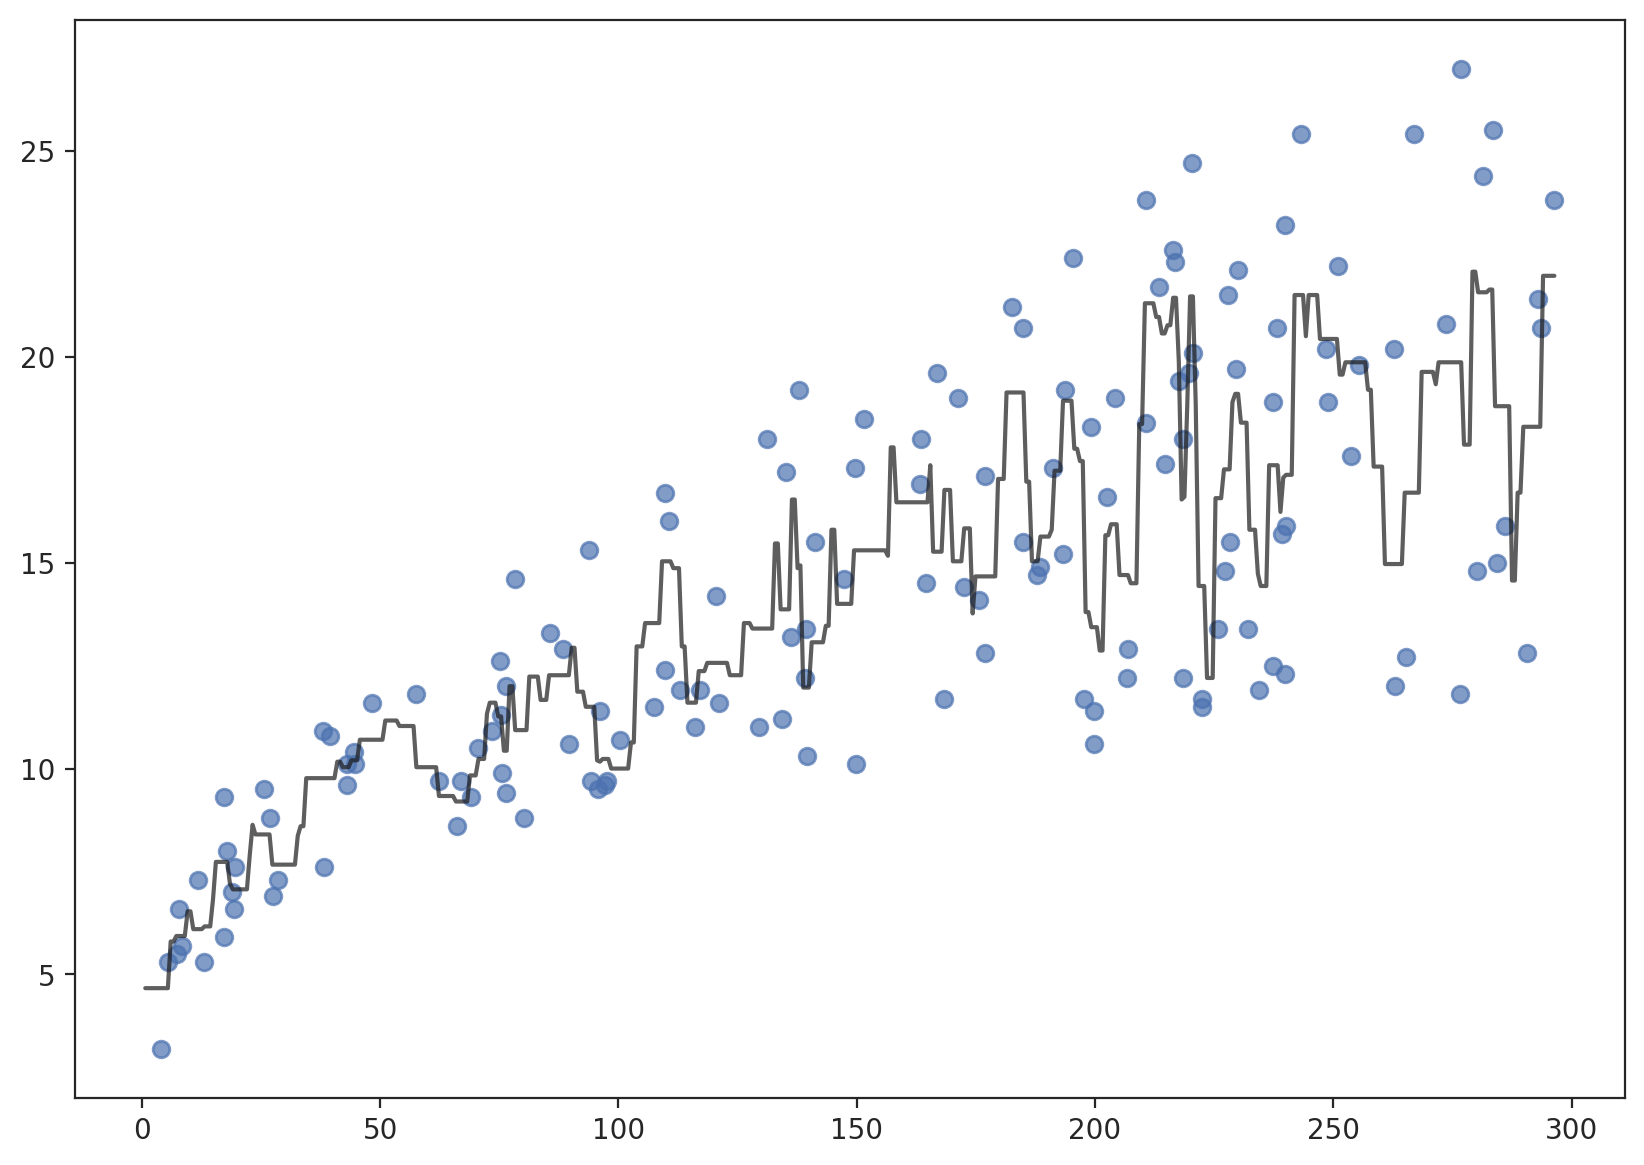

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=3)
knnr.fit(X_tv_train, y_train)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(X_tv_train['TV'], y_train, alpha=0.7)
ax.plot(a_linear_test_set, knnr.predict(a_linear_test_set), '-k', alpha=0.7);

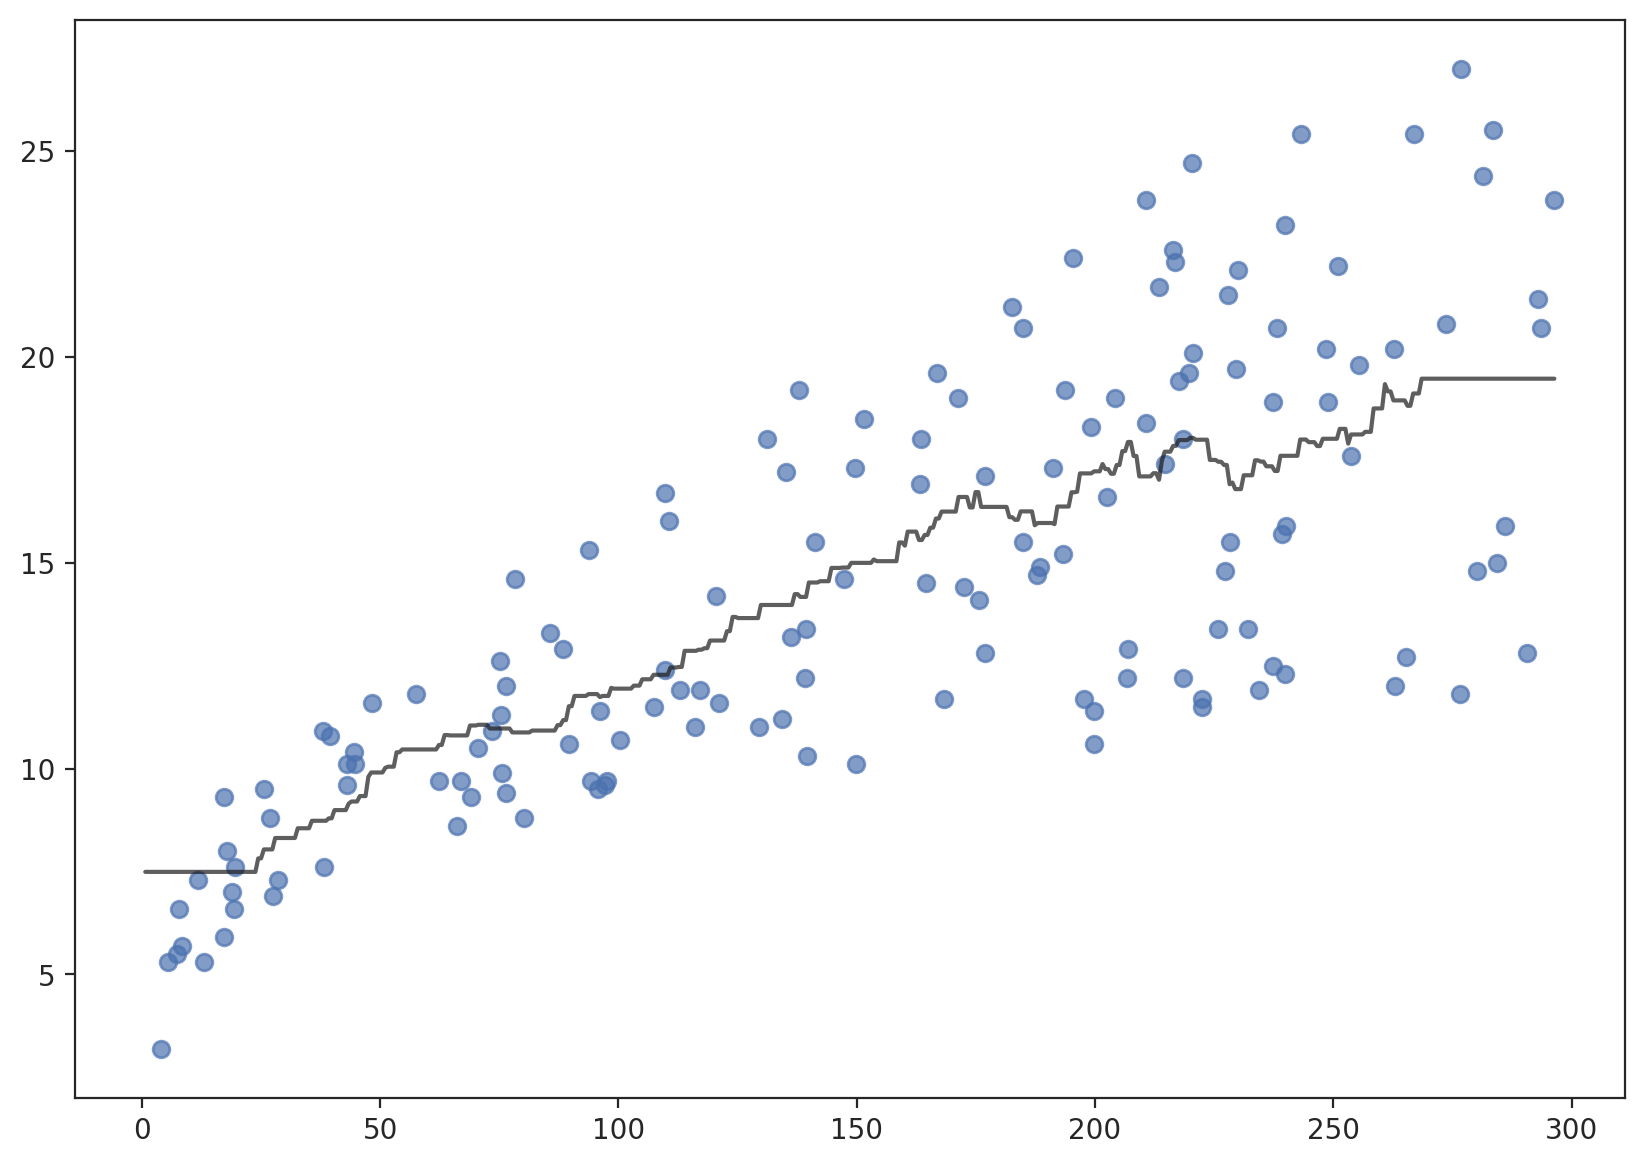

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=22)
knnr.fit(X_tv_train, y_train)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(X_tv_train['TV'], y_train, alpha=0.7)
ax.plot(a_linear_test_set, knnr.predict(a_linear_test_set), '-k', alpha=0.7);

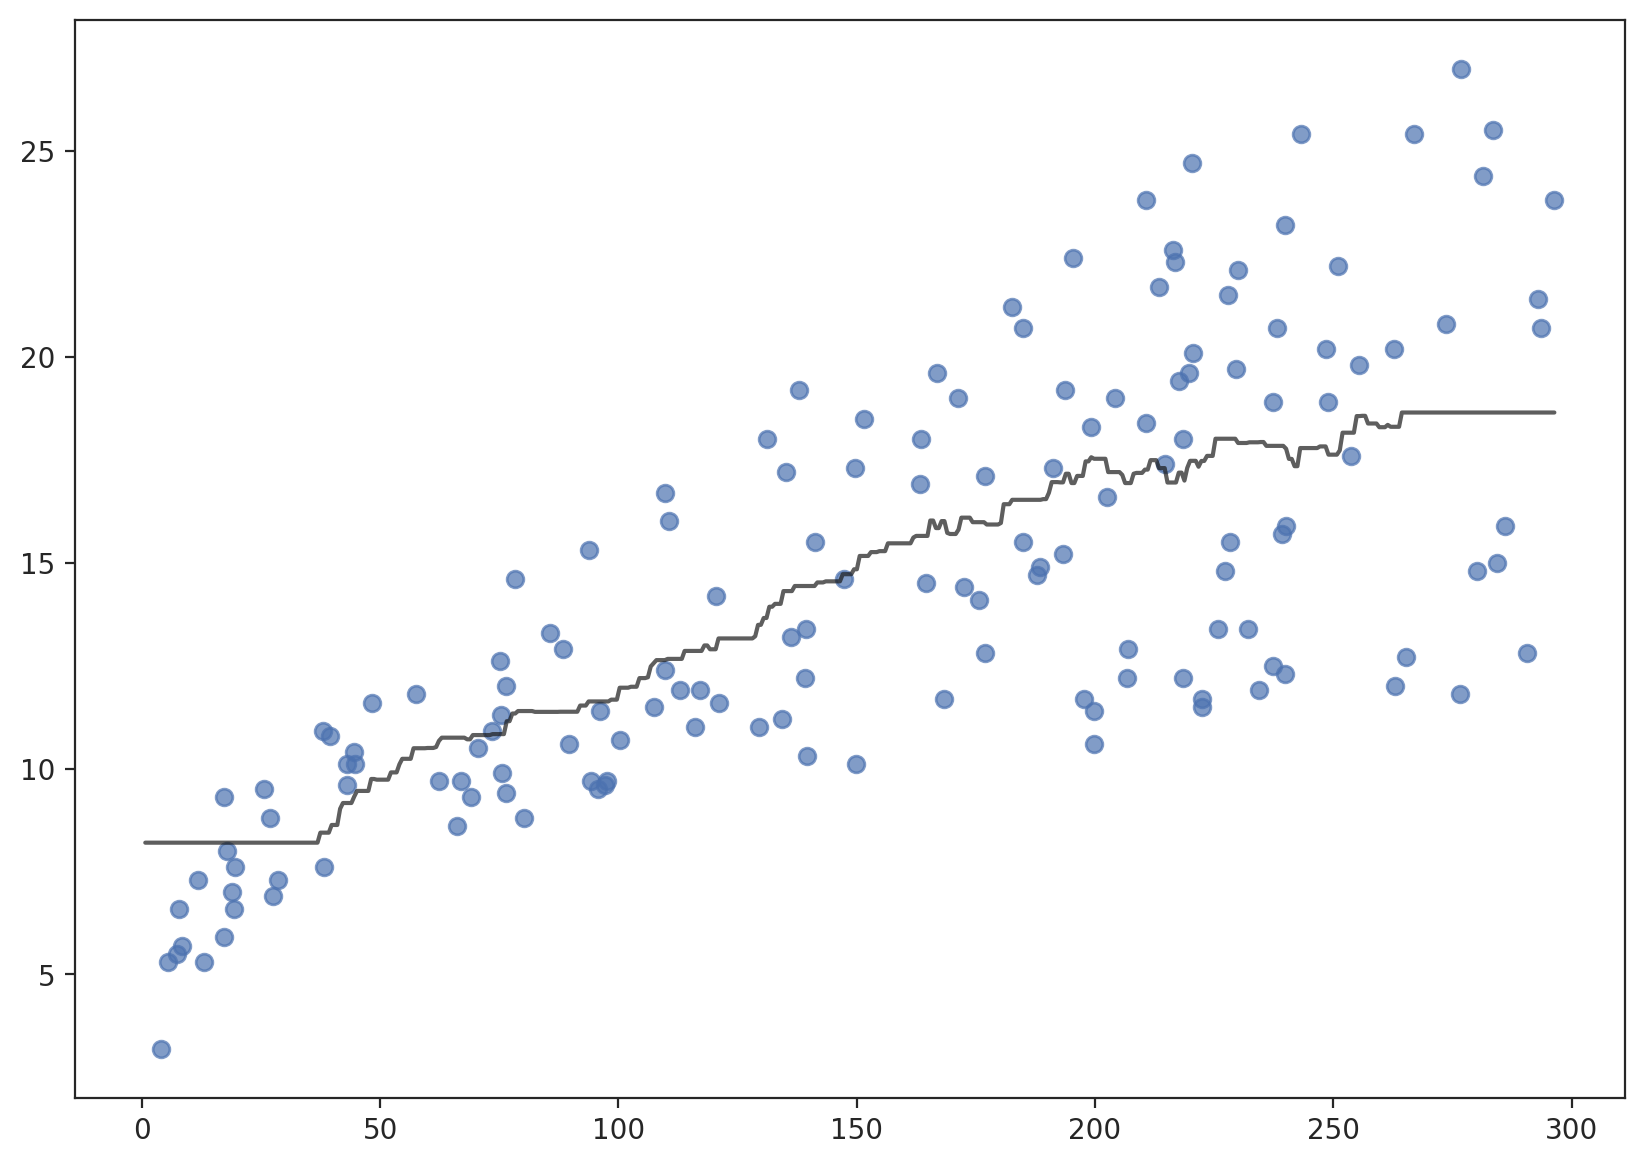

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=30)
knnr.fit(X_tv_train, y_train)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(X_tv_train['TV'], y_train, alpha=0.7)
ax.plot(a_linear_test_set, knnr.predict(a_linear_test_set), '-k', alpha=0.7);

## Scaling the Predictors (e.g., MinMax)

Why? In the context of kNN, features with values measured in different scales will affect distances differently (something in 1000s will have much larger impact on distance when compare to another measure in 10s).

In [ ]:
# we will discuss scaling in more details over the coming weeks; for now, the simplest/commonest strategy
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled[:5]

array([[0.77578627, 0.76209677, 0.60598065],
       [0.1481231 , 0.79233871, 0.39401935],
       [0.0557998 , 0.92540323, 0.60686016],
       [0.50997633, 0.83266129, 0.51187335],
       [0.60906324, 0.21774194, 0.51099384]])

In [ ]:
X_scaled_df = pd.DataFrame(
    X_scaled, columns=X.columns
)

In [ ]:
X_scaled_df.head()

,TV,radio,newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994


In [ ]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [ ]:
X_scaled_df.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,0.494902,0.469032,0.266086
std,0.290342,0.299331,0.191545
min,0.000000,0.000000,0.000000
25%,0.249155,0.201109,0.109499
50%,0.504058,0.461694,0.223835
75%,0.737656,0.736391,0.394019
max,1.000000,1.000000,1.000000


In [ ]:
X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


## Model Fitting

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=11)

In [ ]:
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

## Model Evaluation

### Aggregate Score/Loss

In [ ]:
# score: the higher, the better; loss: the lower, the better

In [ ]:
# interpretation of the score: amount of variance of the target explained by the model
knnr.score(X_train, y_train), knnr.score(X_test, y_test)

(0.8918245767966427, 0.8779790672679365)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# interpretation of the loss: the average residual value (here, sales in US$1000s)
mean_absolute_error(y_train, knnr.predict(X_train))

1.2813939393939393

In [ ]:
mean_absolute_error(y_test, knnr.predict(X_test))

1.4620000000000002

### Residuals

In [ ]:
y_test.iloc[0]

11.3

In [ ]:
# the test data for predict has to be 2D (even if we are providing a single observation)
knnr.predict(X_test.iloc[[0]])

array([10.28181818])

In [ ]:
y_pred = knnr.predict(X_test)

In [ ]:
y_test.head().to_numpy()

array([11.3,  8.4,  8.7, 25.4, 11.7])

In [ ]:
y_pred[:5]

array([10.28181818,  9.48181818,  9.95454545, 21.09090909, 14.        ])

In [ ]:
(y_pred - y_test).head()

19    -1.018182
171    1.081818
108    1.254545
99    -4.309091
178    2.300000
Name: sales, dtype: float64

In [ ]:
# mean absolute error: take the average of the absolute values of the residuals (only the magnitude matters)
np.mean(np.abs(y_pred - y_test))

1.4620000000000002

## Model Analysis

### Actual vs Predicted

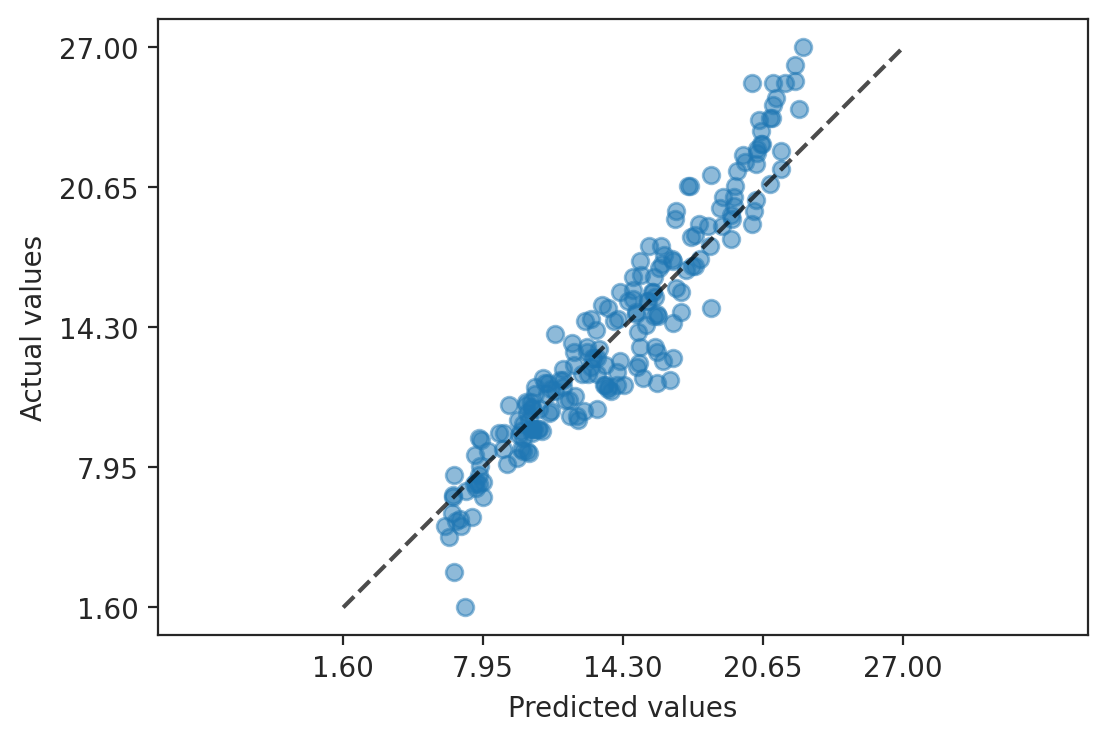

In [ ]:
PredictionErrorDisplay.from_estimator(
    knnr, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

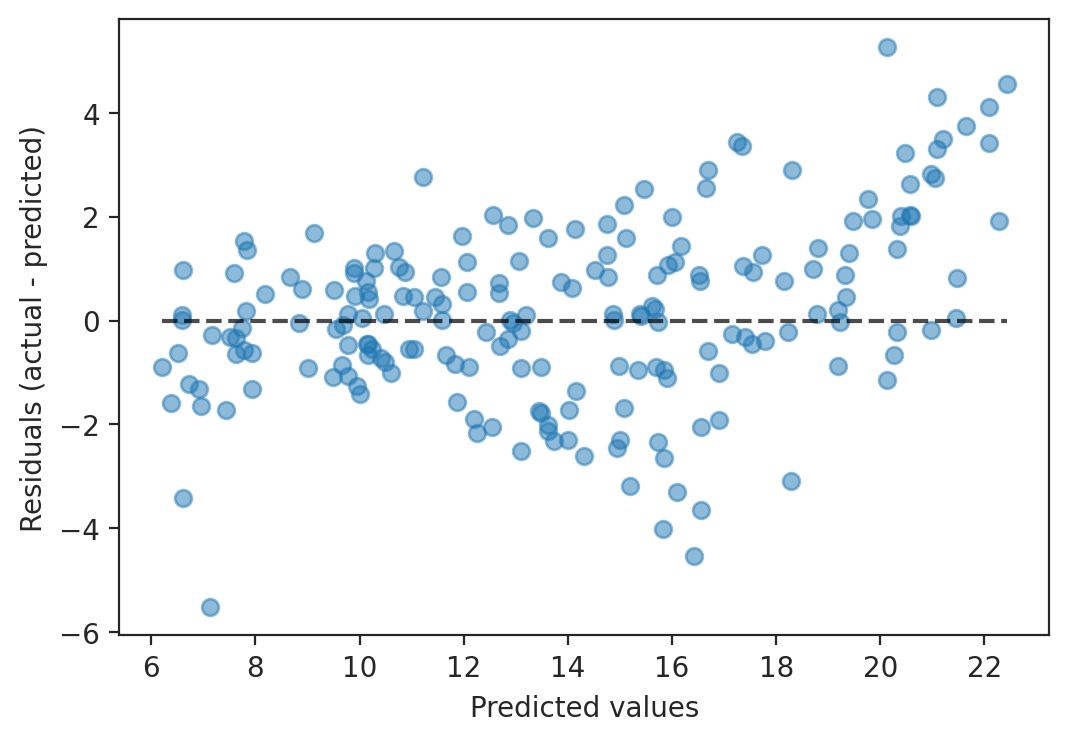

In [ ]:
PredictionErrorDisplay.from_estimator(
    knnr, X, y, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [ ]:
residuals = knnr.predict(X) - y

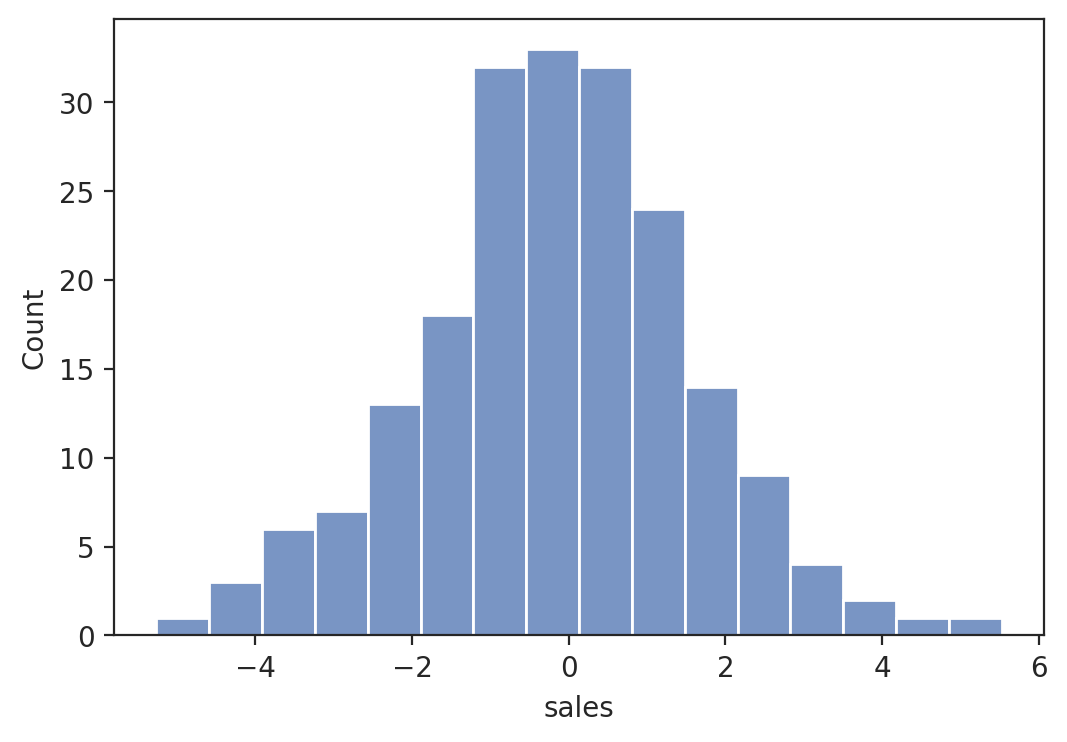

In [ ]:
sns.histplot(residuals);

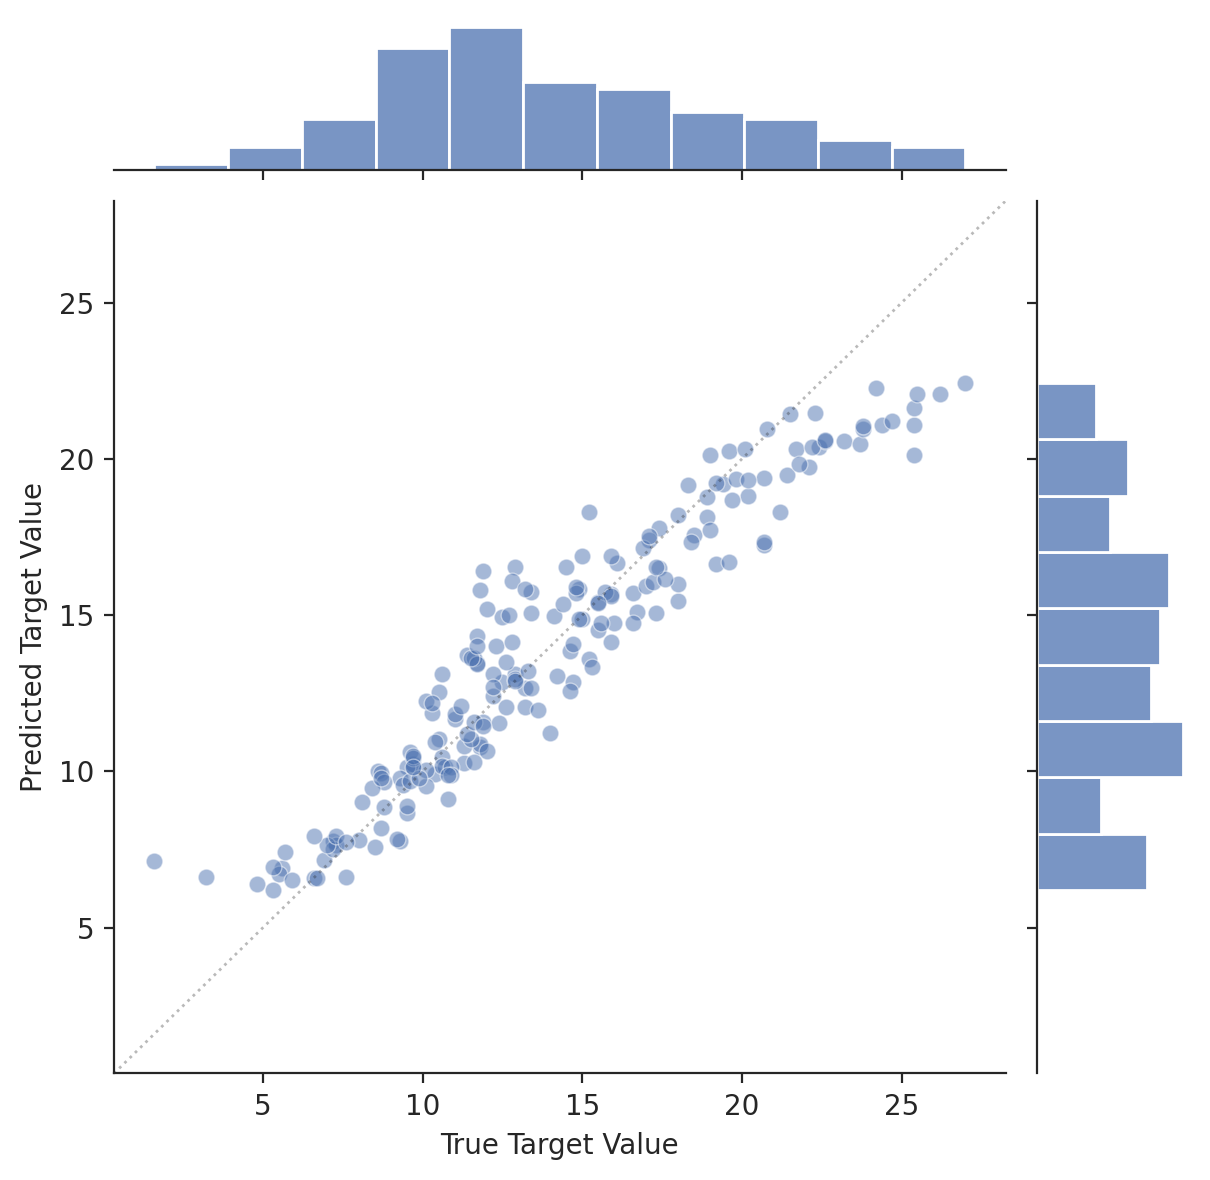

In [ ]:
# my own version of predicted vs actual (translation of axes)
plot_actual_vs_predicted_joint(knnr, X, y);

## Lab Exercise

In a new notebook, build and evaluate a simple kNN regressor on the [California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). You might want to load it with the options `return_X_y=True` and `as_frame=True` (it will return X/y split and as pandas structures). Use mean absolute error as performance metric on both train and test data, and predict vs actual and residual plots for model analysis.